In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [50]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [51]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [52]:
traffic['holiday'].value_counts()

holiday
Labor Day                    7
Thanksgiving Day             6
Christmas Day                6
New Years Day                6
Martin Luther King Jr Day    6
Columbus Day                 5
Veterans Day                 5
Washingtons Birthday         5
Memorial Day                 5
Independence Day             5
State Fair                   5
Name: count, dtype: int64

In [53]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [54]:
traffic['date_time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48204 entries, 0 to 48203
Series name: date_time
Non-Null Count  Dtype 
--------------  ----- 
48204 non-null  object
dtypes: object(1)
memory usage: 376.7+ KB


In [55]:
traffic['date_time'].value_counts()

date_time
2013-05-19 10:00:00    6
2013-04-18 22:00:00    6
2012-12-16 21:00:00    5
2012-10-25 15:00:00    5
2013-12-16 10:00:00    5
                      ..
2015-07-03 20:00:00    1
2015-07-03 21:00:00    1
2015-07-03 22:00:00    1
2015-07-03 23:00:00    1
2018-09-30 23:00:00    1
Name: count, Length: 40575, dtype: int64

STEP 2: Data Preprocessing

In [56]:

#convert date_time to datetime object
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

#Create time_based features
traffic['hour'] = traffic['date_time'].dt.hour
traffic['day_of_week'] = traffic['date_time'].dt.dayofweek
traffic['month'] = traffic['date_time'].dt.month

traffic['year'] = traffic['date_time'].dt.year
traffic['day'] = traffic['date_time'].dt.day
traffic['is_weekend'] = traffic['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Create a mapping from number to day name
day_names = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}

# Apply the mapping to create a new column
traffic['day_name'] = traffic['day_of_week'].map(day_names)

#Convert temp from Kelvin to Celsius
traffic['temp_celsius'] = traffic['temp'] - 273.15


STEP 3: Univariate Analysis (Single Variable Insights)

Text(0.5, 0, 'Weather')

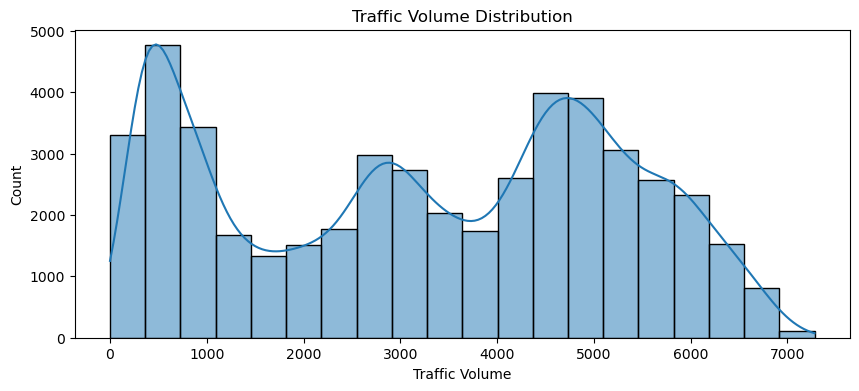

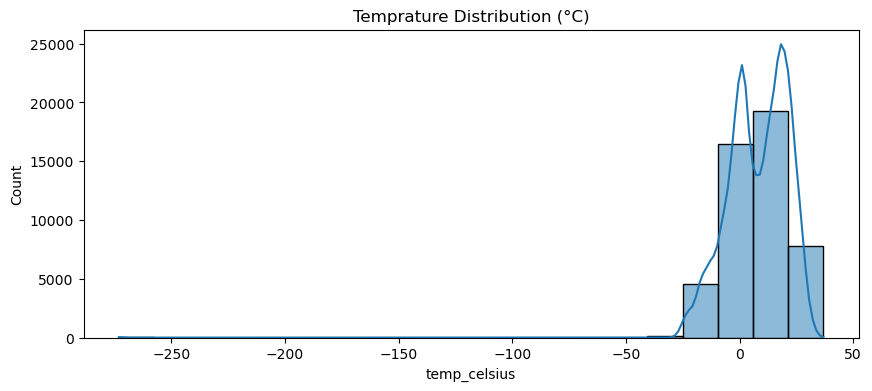

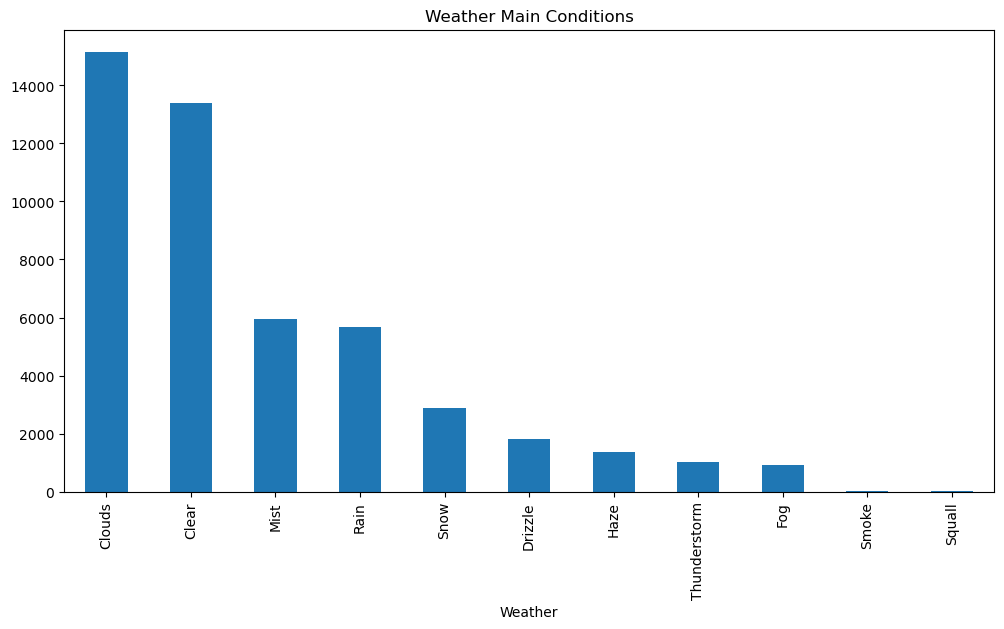

In [57]:
#Traffic Volume Distribution
plt.figure(figsize = (10, 4))
sns.histplot(traffic['traffic_volume'], bins = 20, kde = True)
plt.title('Traffic Volume Distribution')
plt.xlabel('Traffic Volume')


#Temperature Distribution
plt.figure(figsize=(10, 4))
sns.histplot(traffic['temp_celsius'], bins = 20, kde = True)
plt.title('Temprature Distribution (°C)')


#Weather Conditions
plt.figure(figsize = (12, 6))
(traffic['weather_main'].value_counts().plot(kind = 'bar'))
plt.title('Weather Main Conditions')
plt.xlabel('Weather')


STEP 4: Bivariate Analysis (Relationships Between Two Variables)

Text(0.5, 1.0, 'Traffic Volume: Holidays vs Non-Holidays')

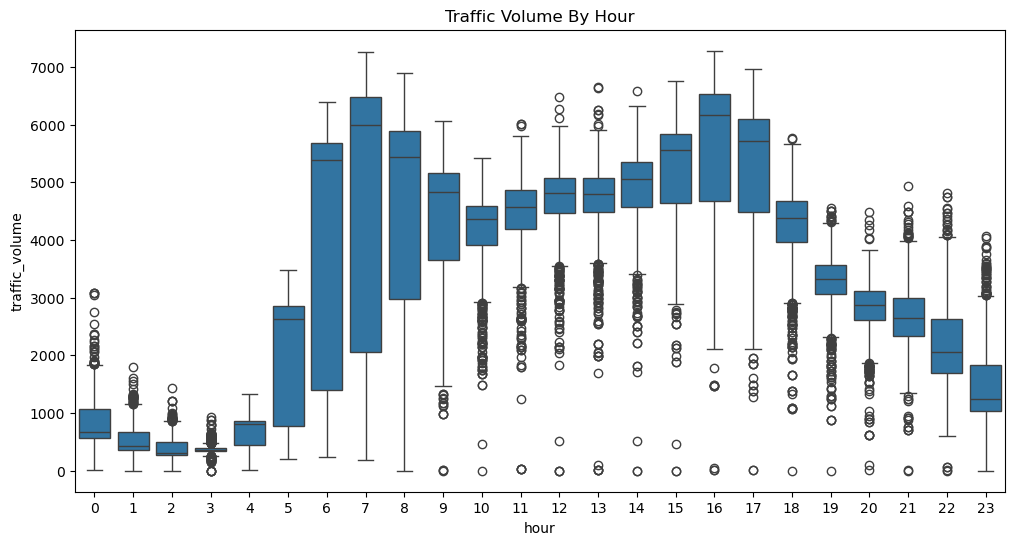

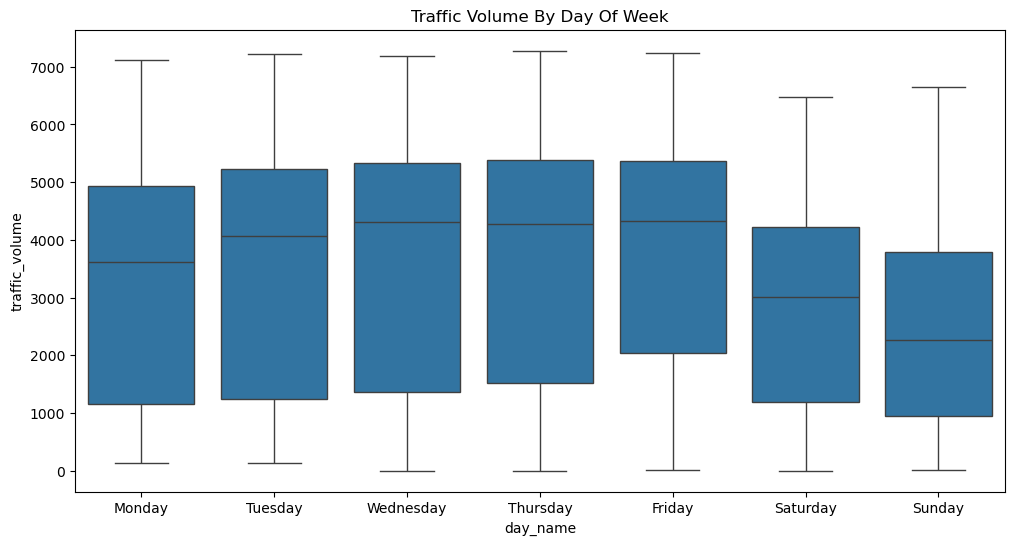

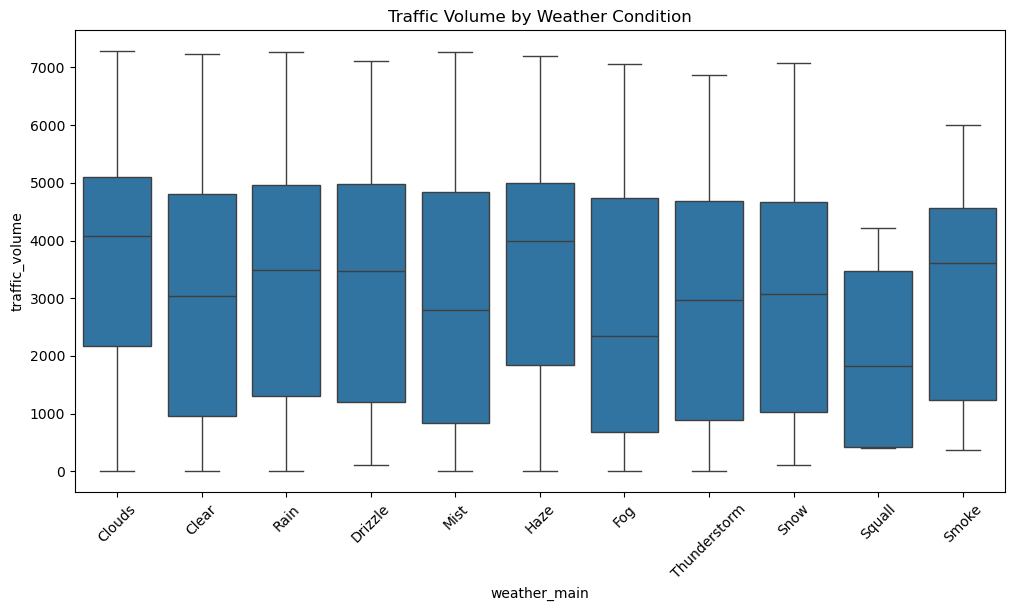

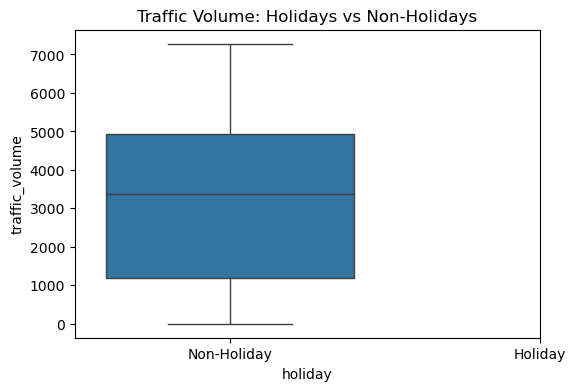

In [58]:
#Traffic Volume by Hour
plt.figure(figsize = (12,6))
sns.boxplot(x = 'hour', y = 'traffic_volume', data=traffic)
plt.title('Traffic Volume By Hour')


#Traffic Volume By Day Of Week
plt.figure(figsize = (12, 6))
sns.boxplot(x='day_name', y='traffic_volume', data=traffic, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.title('Traffic Volume By Day Of Week')



#Traffic Volume by Weather
plt.figure(figsize = (12,6))
sns.boxplot(x = 'weather_main', y = 'traffic_volume', data = traffic)
plt.xticks(rotation = 45)
plt.title('Traffic Volume by Weather Condition')


#Traffic volume on holidays vs non_holidays
plt.figure(figsize = (6,4))
sns.boxplot(x = traffic['holiday'] != 'None', y = 'traffic_volume', data = traffic)
plt.xticks([0,1], ['Non-Holiday', 'Holiday'])
plt.title('Traffic Volume: Holidays vs Non-Holidays')


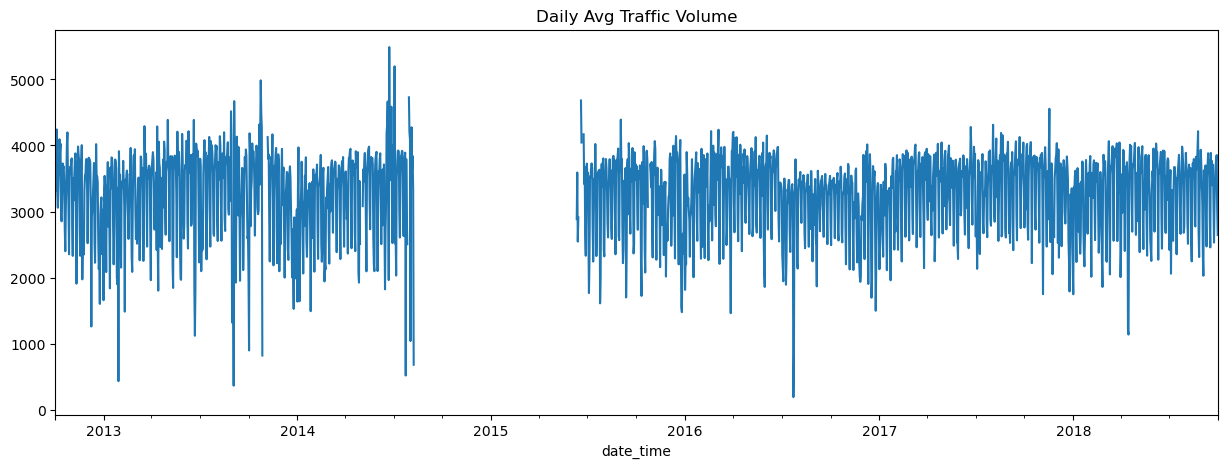

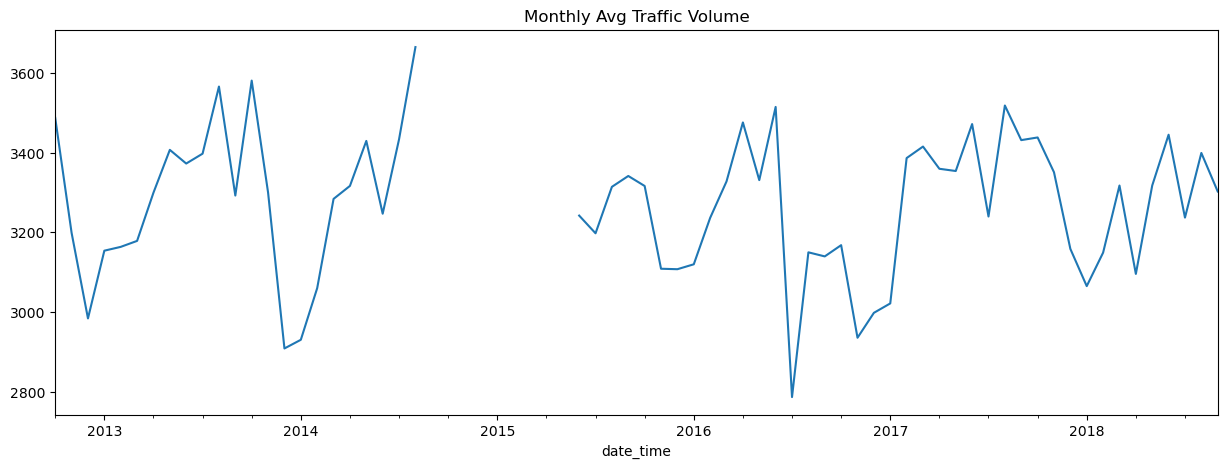

In [59]:
#Set datetime as index for resampling
traffic.set_index('date_time', inplace = True)


# Daily average traffic
traffic['traffic_volume'].resample('D').mean().plot(figsize=(15,5), title='Daily Avg Traffic Volume')
plt.show()

# Monthly trend
traffic['traffic_volume'].resample('ME').mean().plot(figsize=(15,5), title='Monthly Avg Traffic Volume')
plt.show()


                                                    

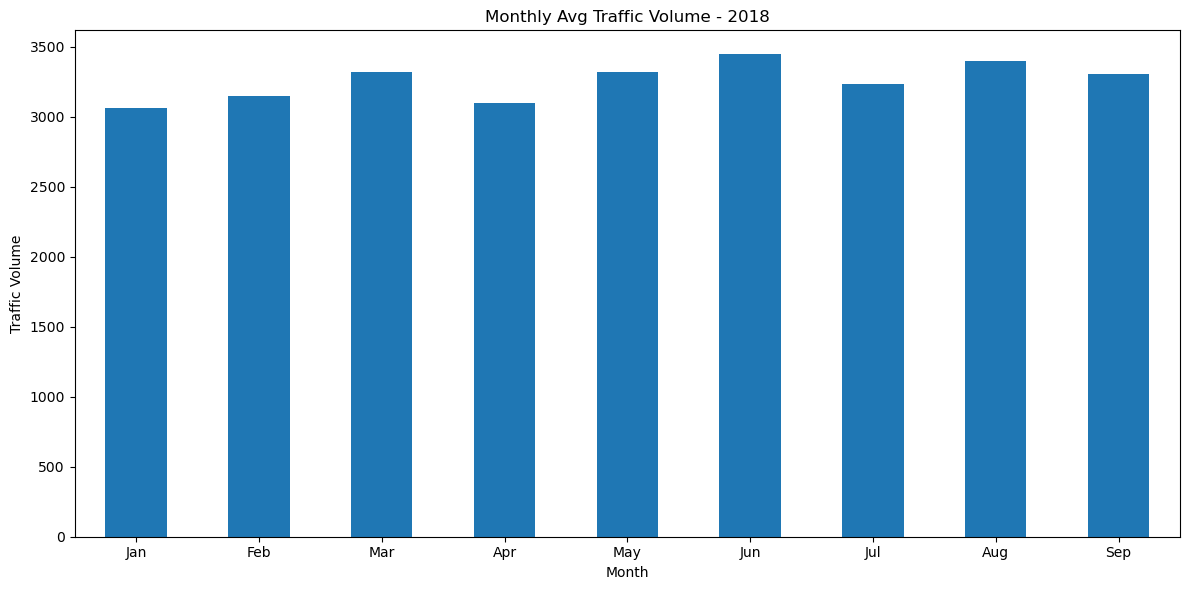

In [63]:
# Make sure your index is datetime
traffic.index = pd.to_datetime(traffic.index)

# Filter rows where the year is 2018
traffic_2018 = traffic[traffic.index.year == 2018]

# Resample to monthly average
monthly_avg_2018 = traffic_2018['traffic_volume'].resample('ME').mean()

# Convert index to month names like Jan, Feb, ...
monthly_avg_2018.index = monthly_avg_2018.index.strftime('%b')

# Plot
import matplotlib.pyplot as plt

monthly_avg_2018.plot(kind='bar', figsize=(12,6), title='Monthly Avg Traffic Volume - 2018')
plt.ylabel('Traffic Volume')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'Correlation Matrix')

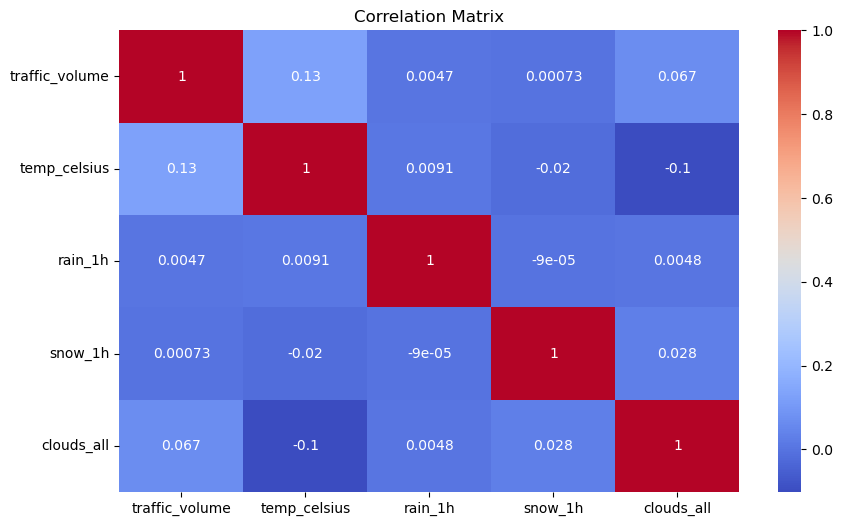

In [14]:
#Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(traffic[['traffic_volume','temp_celsius','rain_1h','snow_1h','clouds_all']].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#Reset index 
traffic.reset_index(inplace=True)

#Select Features
features=['hour','day_of_week','month','is_weekend','temp_celsius','rain_1h','snow_1h','clouds_all']
x=traffic[features]
y=traffic['traffic_volume']

#Train-Test split
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.2, random_state=42)

#Train model (Random Forest)
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train, y_train)

#Predict
y_pred=model.predict(x_test)


#Evaluate
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE:{rmse:.2f}")

RMSE:439.62
